In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
col_names = ['albumin', 'base_excess', 'base_deficit', 'pco2', 'po2', 'bicarbonate', 'bilirubin_total', 'bp_dias', 'bp_sys', 'bun',
              'calcium', 'calcium_ionized', 'chloride', 'co2', 'creatinine', 'fio2', 'glucose', 'hemoglobin', 'lactic_acid', 
              'map', 'pao2_fio2', 'ph', 'platelets', 'potassium', 'ptt', 'pulse', 'pupil_left_size', 'pupil_right_reaction', 'resp', 'sodium', 'spo2', 'temp', 'wbc']

col_names_fixed = ['Albumin', 'Base Excess', 'Base Deficit', 'Arterial PaCO2', 'Arterial PaO2', 'Bicarbonate', 'Bilirubin', 
                   'Diastolic BP', 'Systolic BP', 'BUN', 'Calcium', 'Ionized Calcium', 
                   'Chloride', 'CO2', 'Creatinine', 'FiO2', 'Glucose', 'Hemoglobin', 'Lactic Acid', 
                    'MAP', 'PaO2/FiO2', 'pH', 'Platelets', 'Potassium', 'PTT', 
                    'Heart Rate', 'Pupil L Reaction', 'Pupil L Size', 'Respiratory Rate', 'Sodium', 'SpO2', 
                    'Temperature', 'WBC']

num_vars = ['albumin', 'base_excess', 'base_deficit', 'pco2', 'po2', 'bicarbonate', 'bilirubin_total', 'bp_dias', 'bp_sys', 'bun',
              'calcium', 'calcium_ionized', 'chloride', 'co2', 'creatinine', 'fio2', 'glucose', 'hemoglobin', 'lactic_acid', 
              'map', 'pao2_fio2', 'ph', 'platelets', 'potassium', 'ptt', 'pulse', 'pupil_left_size', 'resp', 'sodium', 'spo2', 'temp', 'wbc']

In [3]:
# Load data
data_eg = pd.read_parquet('/labs/kamaleswaranlab/dchanci/data/pediatric_sepsis/prediction_ml/updated_data/data_models/features_preimp_pivot_eg.parquet.gzip')
data_eg[['dob', 'hosp_adm', 'recorded_time']] = data_eg[['dob', 'hosp_adm', 'recorded_time']].apply(pd.to_datetime)
data_eg.sort_values(by=['csn', 'rel_time'], inplace=True)

# Compute missingness
data_eg = data_eg.groupby('csn', as_index=False).agg(lambda x: x.notnull().sum())
for col in col_names:
    data_eg[col] = data_eg[col] / data_eg['patid']
data_eg = data_eg[col_names]
data_eg.columns = col_names_fixed

In [4]:
# Load data
data_sr = pd.read_parquet('/labs/kamaleswaranlab/dchanci/data/pediatric_sepsis/prediction_ml/updated_data/data_models/features_preimp_pivot_sr.parquet.gzip')
data_sr[['dob', 'hosp_adm', 'recorded_time']] = data_sr[['dob', 'hosp_adm', 'recorded_time']].apply(pd.to_datetime)
data_sr.sort_values(by=['csn', 'rel_time'], inplace=True)

# Compute missingness
data_sr = data_sr.groupby('csn', as_index=False).agg(lambda x: x.notnull().sum())
for col in col_names:
    data_sr[col] = data_sr[col] / data_sr['patid']
data_sr = data_sr[col_names]
data_sr.columns = col_names_fixed

In [5]:
# Organize columns
values = []
names = []
for col in data_eg.columns:
    names.append(col)
    values.append(data_eg[col].sum())
df = pd.DataFrame(zip(names, values), columns=['variables', 'sum'])
df.sort_values(by='sum', inplace=True, ascending=False)

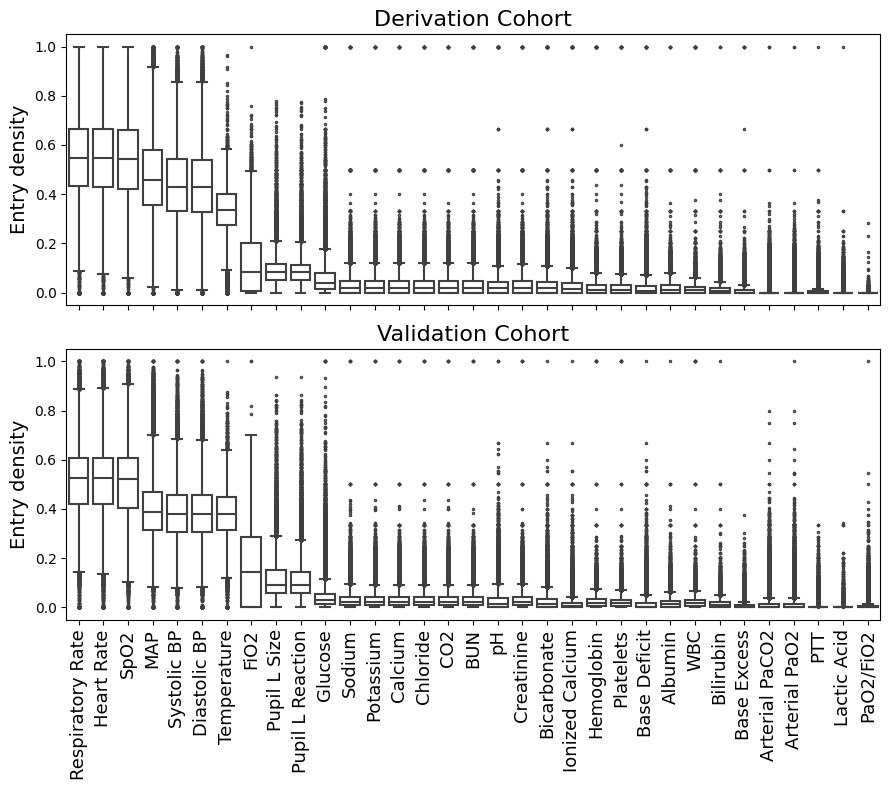

In [6]:
# Plot missingness
fig, axes = plt.subplots(2, 1, figsize=(9, 8))
data_eg = data_eg[list(df['variables'])]
ax1 = sns.boxplot(ax=axes[0], data=data_eg, linewidth=1.5, boxprops={"facecolor": 'white'}, fliersize=3, flierprops={"marker": "."})
ax1.set_ylabel('Entry density', fontsize=14)
ax1.set_title('Derivation Cohort', fontsize=16)
ax1.set(xticklabels=[])
data_sr = data_sr[list(df['variables'])]
ax2 = sns.boxplot(ax=axes[1], data=data_sr, linewidth=1.5, boxprops={"facecolor": 'white'}, fliersize=3, flierprops={"marker": "."})
ax2.tick_params(axis='x', labelrotation=90, labelsize=13)
ax2.set_ylabel('Entry density', fontsize=14)
ax2.set_title('Validation Cohort', fontsize=16)
plt.tight_layout()
fig.savefig('/home/dchanci/projects/ped_sepsis_prediction_ml/models/results_updated/missingness.png')